In [9]:
# download data from https://cellxgene.cziscience.com/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh, Vis_Handler as vh
import umap, numpy as np, pandas as pd, scanpy as sc

sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [10]:
adata = sc.read_h5ad(dh.DATA_EMB_["heart"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

       X_pca, 50
      X_umap, 2


In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [4]:
adata

AnnData object with n_obs × n_vars = 380078 × 1000
    obs: 'NRP', 'cell_source', 'donor_id', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'type', 'cell_states', 'Used', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type_original', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_type_colors', 'cell_type_original_colors', 'log1p', 'neighbors', 'schema_version', 'title', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distance

In [5]:
adata.obsm

AxisArrays with keys: X_pca, X_umap

In [6]:
del adata.obsm

In [7]:
adata.write(rf"{dh.DATA_DIR}/heart/emb_hvg.h5ad", compression="gzip")

### Process the raw data

In [10]:
adata = sc.read_h5ad(dh.DATA_RAW_["heart"])

In [11]:
adata

AnnData object with n_obs × n_vars = 486134 × 33234
    obs: 'NRP', 'cell_source', 'donor_id', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'type', 'cell_states', 'Used', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type_original', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_original_colors', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

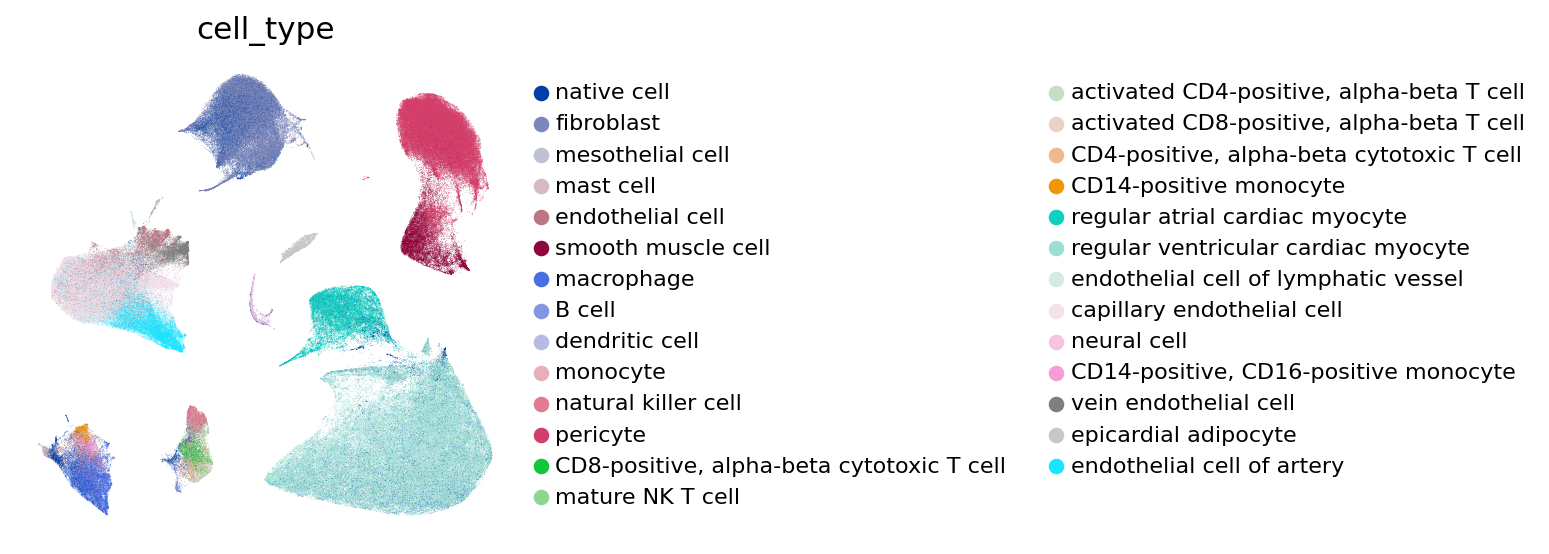

In [12]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["cell_type"],
    **vh.cfg
)

In [13]:
adata.raw

In [14]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

filtered out 105110 cells that have less than 1000 counts
filtered out 946 cells that have less than 500 genes expressed
filtered out 3406 genes that are detected in less than 5 cells
29828 genes x 380078 cells after quality control.
normalizing by total count per cell
    finished (0:00:03): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 380078 × 29828
    obs: 'NRP', 'cell_source', 'donor_id', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'type', 'cell_states', 'Used', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type_original', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_original_colors', 'schema_version', 'title', 'cell_type_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'

In [15]:
adata.obs["sample"].unique()

['H0015_apex', 'H0015_LA_new', 'H0015_LV', 'H0015_RA', 'H0015_RV', ..., 'HCAHeart8102859', 'HCAHeart8102860', 'HCAHeart8102858', 'HCAHeart8102861', 'HCAHeart8102862']
Length: 147
Categories (147, object): ['H0015_LA_new', 'H0015_LV', 'H0015_RA', 'H0015_RV', ..., 'HCAHeart8287125', 'HCAHeart8287126', 'HCAHeart8287127', 'HCAHeart8287128']

In [16]:
uh.umaps_rawcounts(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:22)


AnnData object with n_obs × n_vars = 380078 × 29828
    obs: 'NRP', 'cell_source', 'donor_id', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'type', 'cell_states', 'Used', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type_original', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_original_colors', 'schema_version', 'title', 'cell_type_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [17]:
adata.write(rf"{dh.DATA_DIR}/Heart/emb.h5ad", compression="gzip")

#### Save the metadata

In [2]:
adata = sc.read_h5ad(rf"{dh.DATA_DIR}/Heart/emb.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 380078 × 29828
    obs: 'NRP', 'cell_source', 'donor_id', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'sample', 'scrublet_score', 'source', 'type', 'cell_states', 'Used', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type_original', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_colors', 'cell_type_original_colors', 'log1p', 'neighbors', 'schema_version', 'title', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs["donor_id"].unique()

['H5', 'H6', 'H3', 'H2', 'H7', ..., 'D4', 'D5', 'D6', 'D7', 'D11']
Length: 14
Categories (14, object): ['D1', 'D2', 'D3', 'D4', ..., 'H4', 'H5', 'H6', 'H7']

In [6]:
adata.obs["sample"].unique()

['H0015_apex', 'H0015_LA_new', 'H0015_LV', 'H0015_RA', 'H0015_RV', ..., 'HCAHeart8102859', 'HCAHeart8102860', 'HCAHeart8102858', 'HCAHeart8102861', 'HCAHeart8102862']
Length: 147
Categories (147, object): ['H0015_LA_new', 'H0015_LV', 'H0015_RA', 'H0015_RV', ..., 'HCAHeart8287125', 'HCAHeart8287126', 'HCAHeart8287127', 'HCAHeart8287128']

In [8]:
os.makedirs(rf"{dh.META_DIR}/heart/")

In [ ]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/heart/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["donor_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/heart/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()